### Building Chatbot With Multiple Tools Using Langgraph

**Aim**

Create a chatbot with tool capabilities from arxiv, wikipedia search and some functions

### ✅ Goal:
Build a chatbot using LLM + Tools in a LangGraph workflow. The chatbot should decide when to use tools like a calculator or weather API, and respond accordingly.

🧠 Why Tools with LLM?

•	🤖 LLMs (like GPT) can understand language but don’t have real-time data or calculations.

•	🔌 Tools help LLMs perform tasks they can't do on their own.

•	🛠️ Tools can be:

o	External APIs (🌦️ Weather API)

o	3rd Party APIs

o	Databases (📦 SQL, 🧠 Vector DBs)

o	Custom functions (➕ Add two numbers)


In [14]:
# ✅ Step 1: Set Up Environment
from dotenv import load_dotenv
import os

load_dotenv()
# os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
# 🔹 This sets up your API keys so LLMs and tools can work.

# ✅ Step 2: Chat Messages as Graph State
# •	💬 Use different message types to create a chat simulation:
# o	AIMessage, HumanMessage, etc.
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint
# 🔹 Create Messages Manually
messages = []

# 🤖 AI Message
messages.append(AIMessage(content="Please tell me how can I help?", name="LLM_Model"))

# 🧑‍💻 Human Message
messages.append(HumanMessage(content="I want to learn coding", name="Apoorv"))

# 🤖 AI Response Again
messages.append(AIMessage(content="Which programming language do you want to learn?", name="LLM_Model"))
# 🔹 Print Messages Nicely
for msg in messages:
    msg.pretty_print()
# ==================================[1m Ai Message [0m==================================
# Name: LLM_Model

# Please tell me how can I help?
# ================================[1m Human Message [0m=================================
# Name: Apoorv

# I want to learn coding
# ==================================[1m Ai Message [0m==================================
# Name: LLM_Model

# Which programming language do you want to learn?


# 📌 Output shows:
# •	Message type (AI/Human)
# •	Name (who said it)
# •	Message content
# Looks like:
# AI: Please tell me how can I help?
# Human: I want to learn coding
# AI: Which programming language do you want to learn?


================================== Ai Message ==================================
Name: LLM_Model

Please tell me how can I help?
================================ Human Message =================================
Name: Apoorv

I want to learn coding
================================== Ai Message ==================================
Name: LLM_Model

Which programming language do you want to learn?


In [17]:
# ✅ Step 3: Use Chat Model with Messages
from langchain_groq import ChatGroq

# llm = ChatGroq(model_name="groq/compound-mini")

# Use a production-ready model that supports tool use capabilities
llm = ChatGroq(model_name="llama-3.3-70b-versatile")
# 🔹 Add another human message
messages.append(HumanMessage(content="I want to learn Python programming language", name="Apoorv"))
# 🔹 Invoke LLM with messages
response = llm.invoke(messages)
print(response)
# content='Python is a great language to learn. What do you want to do with Python? Do you want to:\n\n1. Build web applications?\n2. Work with data science and machine learning?\n3. Automate tasks?\n4. Create games?\n\nKnowing your goals will help me provide more tailored guidance. \n\nAlso, are you a complete beginner or do you have some programming experience?' response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 409, 'total_tokens': 597, 'completion_time': 0.51895, 'prompt_time': 0.036868, 'queue_time': 0.135441, 'total_time': 0.555818}, 'model_name': 'groq/compound-mini', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-5e030150-9eb5-468b-8e7b-e324d4a00439-0' usage_metadata={'input_tokens': 409, 'output_tokens': 188, 'total_tokens': 597}

# 📌 LLM reads the full message history and responds to the last message:
"Great choice! Python is a versatile language used in data science, AI, etc."
# ✅ Step 4: See Metadata of the LLM Response
response.response_metadata
# {'token_usage': {'completion_tokens': 188,
#   'prompt_tokens': 409,
#   'total_tokens': 597,
#   'completion_time': 0.51895,
#   'prompt_time': 0.036868,
#   'queue_time': 0.135441,
#   'total_time': 0.555818},
#  'model_name': 'groq/compound-mini',
#  'system_fingerprint': None,
#  'finish_reason': 'stop',
#  'logprobs': None}


# 📊 You get:
# •	Total tokens used
# •	Latency
# •	Model name
# •	Finish reason
# ✅ This helps track costs, performance, and model behavior.

content='Python is a great language to learn. Here\'s a step-by-step guide to get you started:\n\n**Why Python?**\nPython is a popular, easy-to-learn language used in various fields like web development, data analysis, artificial intelligence, and more. It\'s a versatile language with a large community, making it easy to find resources and libraries.\n\n**Setting up Python**\nTo start learning Python, you\'ll need to:\n\n1. **Install Python**: Download and install the latest version of Python from the official Python website: <https://www.python.org/downloads/>\n2. **Choose a Text Editor or IDE**: A text editor or Integrated Development Environment (IDE) is where you\'ll write your Python code. Popular choices include:\n\t* PyCharm\n\t* Visual Studio Code (VS Code)\n\t* Sublime Text\n\t* Atom\n3. **Familiarize yourself with the interface**: Once you\'ve installed Python and chosen a text editor or IDE, take some time to explore the interface and get comfortable with it.\n\n**Basic Pyth

{'token_usage': {'completion_tokens': 538,
  'prompt_tokens': 103,
  'total_tokens': 641,
  'completion_time': 1.05006693,
  'prompt_time': 0.020436903,
  'queue_time': 0.046188437,
  'total_time': 1.070503833},
 'model_name': 'llama-3.3-70b-versatile',
 'system_fingerprint': 'fp_3f3b593e33',
 'finish_reason': 'stop',
 'logprobs': None}

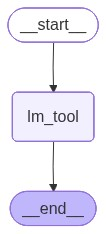

In [19]:
# 🛠️ Building a Tool (Example: Add Function)
def add(a: int, b: int) -> int:
    """
    Add a and b.
    a: First number
    b: Second number
    Returns the sum of a and b
    """
    return a + b
# •	This is a simple function that adds two numbers.
# •	The docstring helps LLM understand what this function does.

# If LLM know I have a tool for addition then we need to use binding(it means adding this add function to LLM)

# 🔗 Step 1: Bind Tool with LLM
llm_with_tool = llm.bind_tools([add])
# •	This tells the LLM:
# 📢 “Hey, you have access to a tool called add.”

# 💬 Step 2: Send a Human Message
tool_call =llm_with_tool.invoke([HumanMessage(content="Hey, what is 2 plus 2?",name="Apoorv")]) 
# 📞 Step 3: LLM makes a Tool Call
tool_call.tool_calls
# [ToolCall(name='add', args={'a': 2, 'b': 2}, tool_input=None, tool_output=None)]

# •	When you send this, LLM:
# o	Understands the question is about addition.
# o	Decides to use the add tool.
# o	Calls it with: a = 2, b = 2

# Using message as State
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    message:list[AnyMessage]

# 🧾 Why We Need Reducers
# •	📌 Problem: When adding messages between nodes, old messages get overwritten.
# •	🛠️ Solution: Use add_messages reducer to append messages

from langgraph.graph import add_messages
from typing_extensions import Annotated
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
# •	✅ This ensures messages are not lost as they go through the nodes.

# 📬 Message Flow Example
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="Apoorv"))

ai_message=AIMessage(content=f"which programming language you want to learn",name="LLMModel")
add_messages=add_messages(initial_messages,ai_message)
add_messages
# [HumanMessage(content='I want to learn coding', name='Apoorv'), AIMessage(content='which programming language you want to learn', name='LLMModel')]
 
## chatbot node functionality
def llm_tool(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}


# # 🗺️ Building the LangGraph
# from IPython.display import Image, display
# from langgraph.graph import StateGraph, START, END

# builder=StateGraph(State)
# builder.add_node("lm_tool", llm_tool)
# builder,add_edge(START,"lm_tool")
# builder,add_edge("lm_tool",END)

# graph=builder.compile()

# # view the graph
# display(Image(graph.get_graph().draw_mermaid_png()))

# # invocation
# messages=graph.invoke({"messages":"What is 2 plus 2"})

# for message in messages["messages"]:
#     message.pretty_print()

# 🗺️ Building the LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("lm_tool", llm_tool)

# ✅ CORRECTED: Use dot notation, not comma
builder.add_edge(START, "lm_tool")
builder.add_edge("lm_tool", END)

graph = builder.compile()

# View the graph
display(Image(graph.get_graph().draw_mermaid_png()))



In [ ]:
from langchain_core.messages import HumanMessage

messages = graph.invoke({
    "messages": [HumanMessage(content="What is 2 plus 2?", name="Apoorv")]
})

# # Print the result
# for message in messages["messages"]:
#     message.pretty_print()
# ================================[1m Human Message [0m=================================
# Name: Apoorv

# What is 2 plus 2?
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   add (ggbndq45a)
#  Call ID: ggbndq45a
#   Args:
#     a: 2
#     b: 2


================================ Human Message =================================
Name: Apoorv

What is 2 plus 2?
================================== Ai Message ==================================
Tool Calls:
  add (ggbndq45a)
 Call ID: ggbndq45a
  Args:
    a: 2
    b: 2


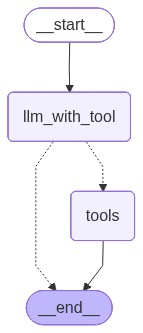

In [23]:
tools=[add]
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition 
builder = StateGraph(State)
# Add the node
builder.add_node("llm_with_tool", llm_with_tool)
builder.add_node("tools", ToolNode(tools))
## Add Edge
builder.add_edge(START, "llm_with_tool")
builder.add_conditional_edges("llm_with_tool", tools_condition)

builder.add_edge("tools", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))